In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

import json

In [187]:
#Data Set Option 1: csv file

# File to Load 
file_to_load = "XAU_USD2000_2020.csv"

gold_df = pd.read_csv(file_to_load)

gold_df["Date"] = pd.to_datetime(gold_df['Date']) 
gold_df = gold_df.replace(',','', regex=True)
gold_df['Daily_Change'] = gold_df['Price'].astype(float) - gold_df['Open'].astype(float)
gold_df = gold_df[["Date", "Price", "Open", "High", "Low", 'Change %', 'Daily_Change']]
gold_df = gold_df.rename(columns = {"Price": "close"})
gold_df

gold_change = gold_df[["Date","Change %","Open","Daily_Change"]]
gold_change
gold_change["DailyAfterMarketChange"] = ""
yest_gold = 1

gold_change = gold_change.sort_values(by='Date', ascending=True)

gold_change['Change %'] = gold_change['Change %'].str.rstrip('%').astype('float') 
gold_change['Open'] = gold_change['Open'].astype('float') 

change_gold = 0
loopCnt = 0
for ind in gold_change.index:
    if loopCnt > 0 :
        change_gold = ((gold_change['Open'][ind] - yest_gold)) 
        yest_gold = gold_change['Open'][ind]
    else:
        change_gold = 0
        yest_gold = gold_change['Open'][ind]        
        loopCnt = loopCnt + 1
    gold_change["DailyAfterMarketChange"][ind] = change_gold
    
gold_change[["Date","Change %","Open","Daily_Change","DailyAfterMarketChange"]]
#gold_change["New Gold Change"].sum()

gold_change['year'] = pd.DatetimeIndex(gold_change['Date']).year



/Users/samchari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/samchari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [192]:
test_df = pd.DataFrame(gold_change.groupby("year")[["Change %"]].sum())
test_df.reset_index()
print(test_df["Change %"].sum())
test_df

222.05000000000007


,Change %
year,
2000,-4.35
2001,3.46
2002,22.69
2003,19.31
2004,6.64
2005,17.41
2006,23.56
2007,28.41
2008,10.33


In [85]:
#Data Set Option 1: csv file

# File to Load 
file_to_load2 = "SPYHistorical2000_2020.csv"

spy_df = pd.read_csv(file_to_load2)

spy_df["Date"] = pd.to_datetime(spy_df['Date']) 
spy_df = spy_df.replace(',','', regex=True)
spy_df['Daily_Change'] = spy_df['Price'].astype(float) - spy_df['Open'].astype(float)

spy_df = spy_df[["Date", "Price", "Open", "High", "Low", 'Change %', 'Daily_Change']]
spy_df = spy_df.rename(columns = {"Price": "close"})
spy_df

,Date,close,Open,High,Low,Change %,Daily_Change
0,2020-08-14,336.84,336.41,337.42,335.62,0.00%,0.43
1,2020-08-13,336.83,337.02,338.25,335.85,-0.18%,-0.19
2,2020-08-12,337.44,335.56,338.28,335.56,1.39%,1.88
3,2020-08-11,332.80,336.95,337.52,332.05,-0.83%,-4.15
4,2020-08-10,335.57,335.05,335.76,332.98,0.30%,0.52
...,...,...,...,...,...,...,...
5199,2000-01-07,145.75,140.31,145.75,140.06,5.81%,5.44
5200,2000-01-06,137.75,139.62,141.50,137.75,-1.61%,-1.87
5201,2000-01-05,140.00,139.94,141.53,137.25,0.18%,0.06
5202,2000-01-04,139.75,143.53,144.06,139.64,-3.91%,-3.78


In [151]:
XAU_SPY_df = pd.merge(gold_df,spy_df,on="Date",suffixes=['_gold','_spy'])
XAU_SPY_df.set_index("Date")
XAU_SPY_df['Change %_gold'] = XAU_SPY_df['Change %_gold'].str.rstrip('%').astype('float') 
XAU_SPY_df['Change %_spy'] = XAU_SPY_df['Change %_spy'].str.rstrip('%').astype('float') 

XAU_SPY_df['close_gold'] = XAU_SPY_df['close_gold'].astype('float') 
XAU_SPY_df['close_spy'] = XAU_SPY_df['close_spy'].astype('float') 


XAU_SPY_df["New Gold Change"] = ""

XAU_SPY_df

,Date,close_gold,Open_gold,High_gold,Low_gold,Change %_gold,Daily_Change_gold,close_spy,Open_spy,High_spy,Low_spy,Change %_spy,Daily_Change_spy,New Gold Change
0,2020-08-14,1943.76,1953.70,1962.84,1932.65,-0.48,-9.94,336.84,336.41,337.42,335.62,0.00,0.43,
1,2020-08-13,1953.03,1920.90,1966.43,1912.93,1.84,32.13,336.83,337.02,338.25,335.85,-0.18,-0.19,
2,2020-08-12,1917.82,1912.00,1949.45,1864.30,0.34,5.82,337.44,335.56,338.28,335.56,1.39,1.88,
3,2020-08-11,1911.25,2027.34,2032.19,1901.69,-5.72,-116.09,332.80,336.95,337.52,332.05,-0.83,-4.15,
4,2020-08-10,2027.26,2034.19,2050.01,2019.41,-0.36,-6.93,335.57,335.05,335.76,332.98,0.30,0.52,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,2000-01-07,281.75,281.15,281.75,281.75,0.18,0.60,145.75,140.31,145.75,140.06,5.81,5.44,
5185,2000-01-06,281.23,280.12,281.23,281.23,0.08,1.11,137.75,139.62,141.50,137.75,-1.61,-1.87,
5186,2000-01-05,281.00,281.5,281,281,-0.51,-0.50,140.00,139.94,141.53,137.25,0.18,0.06,
5187,2000-01-04,282.45,288.75,282.45,282.45,-2.27,-6.30,139.75,143.53,144.06,139.64,-3.91,-3.78,


In [158]:

yest_gold = 1
yest_spy = 0
XAU_SPY_df = XAU_SPY_df.sort_values(by='Date', ascending=True)
loopCnt = 0
for ind in XAU_SPY_df.index:
    #print(XAU_SPY_df['Daily_Change_gold'][ind], XAU_SPY_df['Daily_Change_spy'][ind])    
    if loopCnt > 0 :
        change_gold = ((XAU_SPY_df['close_gold'][ind] - yest_gold)/yest_gold) * 100
        yest_gold = XAU_SPY_df['close_gold'][ind]
    else:
        change_gold = 0
        yest_gold = XAU_SPY_df['close_gold'][ind]        
        loopCnt = loopCnt + 1
    XAU_SPY_df["New Gold Change"][ind] = change_gold
    
XAU_SPY_df[["Date","close_gold","Open_gold","New Gold Change","Change %_gold"]]

/Users/samchari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,close_gold,Open_gold,New Gold Change,Change %_gold
5188,2000-01-03,289.00,288.5,0,0.26
5187,2000-01-04,282.45,288.75,-2.26644,-2.27
5186,2000-01-05,281.00,281.5,-0.513365,-0.51
5185,2000-01-06,281.23,280.12,0.0818505,0.08
5184,2000-01-07,281.75,281.15,0.184902,0.18
...,...,...,...,...,...
4,2020-08-10,2027.26,2034.19,-0.361738,-0.36
3,2020-08-11,1911.25,2027.34,-5.7225,-5.72
2,2020-08-12,1917.82,1912.00,0.343754,0.34
1,2020-08-13,1953.03,1920.90,1.83594,1.84


In [105]:
gold_c = XAU_SPY_df.iloc[:,1]
spy_c = XAU_SPY_df.iloc[:,7]
correlation = st.pearsonr(gold_c,spy_c)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Compare the calcualted Pearson's r to the plots
# plt.figure(figsize=(15,6))
# plt.scatter(gold_c,spy_c)
# plt.xlabel('Gold Change percent')
# plt.ylabel('Spy Change percent')
# print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.57


The correlation coefficient is = 0.568


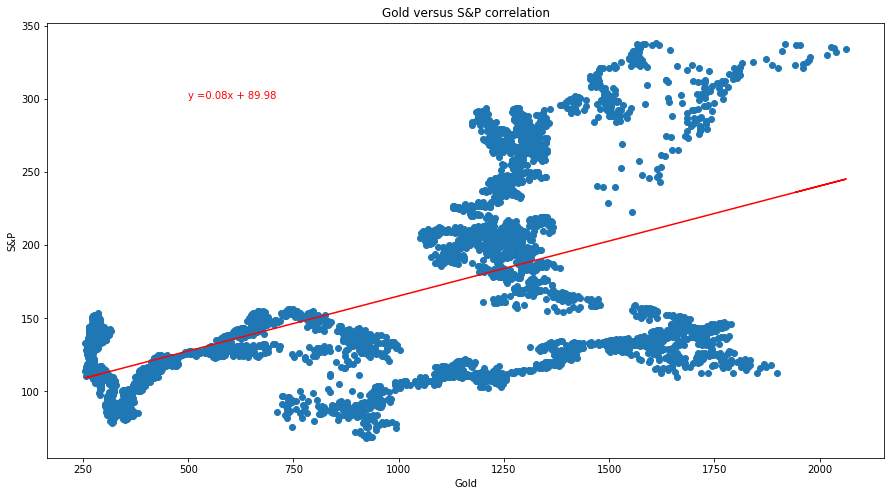

,close_gold,Change %_gold,Daily_Change_gold,close_spy,Open_spy,High_spy,Low_spy,Change %_spy,Daily_Change_spy
close_gold,1.000000,0.004475,0.013194,0.568522,0.568069,0.568144,0.568265,0.021001,0.025188
Change %_gold,0.004475,1.000000,0.897150,-0.005989,-0.005779,-0.005725,-0.006034,-0.014951,-0.008882
Daily_Change_gold,0.013194,0.897150,1.000000,0.004878,0.004834,0.005005,0.004685,0.015363,0.001928
close_spy,0.568522,-0.005989,0.004878,1.000000,0.999716,0.999802,0.999821,0.026411,0.022848
Open_spy,0.568069,-0.005779,0.004834,0.999716,1.000000,0.999853,0.999814,0.008397,-0.000990
High_spy,0.568144,-0.005725,0.005005,0.999802,0.999853,1.000000,0.999666,0.013826,0.008757
Low_spy,0.568265,-0.006034,0.004685,0.999821,0.999814,0.999666,1.000000,0.016762,0.011190
Change %_spy,0.021001,-0.014951,0.015363,0.026411,0.008397,0.013826,0.016762,1.000000,0.755787
Daily_Change_spy,0.025188,-0.008882,0.001928,0.022848,-0.000990,0.008757,0.011190,0.755787,1.000000


In [136]:

x_values = XAU_SPY_df["close_gold"]
y_values = XAU_SPY_df["close_spy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

CorrCoeff = XAU_SPY_df.corr()
CorrCoeff_Val = round(CorrCoeff['close_gold'][4],3)
print(f"The correlation coefficient is = {CorrCoeff_Val}")


plt.figure(figsize=(15,8))
plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(500,300),fontsize=10,color="red")
plt.xlabel("Gold")
plt.ylabel("S&P")
plt.title("Gold versus S&P correlation")
plt.show()
CorrCoeff

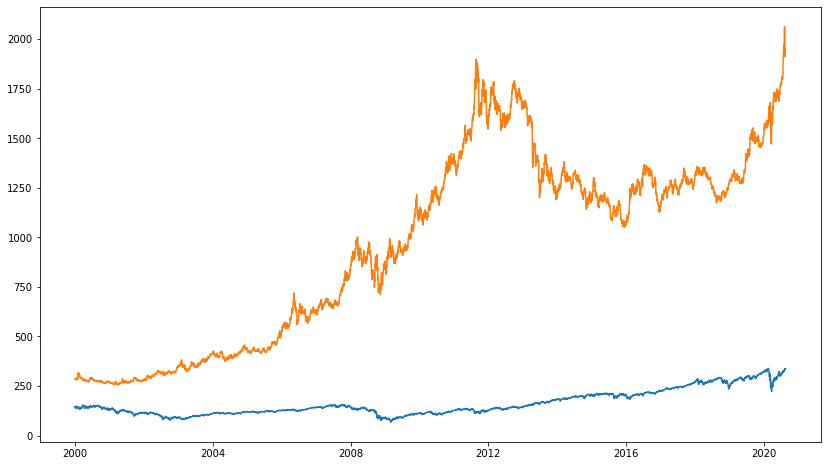

In [138]:
# Plot both on the same chart
x_axis_data = XAU_SPY_df["Date"]

plt.figure(figsize=(14,8))


plt.plot(x_axis_data, spy_c)
plt.plot(x_axis_data, gold_c)


plt.show()

In [73]:
greatest_change = gold_df.loc[gold_df['Change %'] >= '-4.00%']
greatest_change

,Date,close,Open,High,Low,Change %,Daily_Change
1,2020-08-13,1953.03,1920.90,1966.43,1912.93,1.84%,32.13
2,2020-08-12,1917.82,1912.00,1949.45,1864.30,0.34%,5.82
3,2020-08-11,1911.25,2027.34,2032.19,1901.69,-5.72%,-116.09
6,2020-08-06,2063.19,2040.40,2069.77,2034.71,1.17%,22.79
7,2020-08-05,2039.40,2018.98,2055.68,2009.77,1.06%,20.42
...,...,...,...,...,...,...,...
5360,2000-01-13,284.25,282.6,284.25,284.25,0.63%,1.65
5362,2000-01-11,283.38,281.48,283.38,283.38,0.68%,1.90
5364,2000-01-07,281.75,281.15,281.75,281.75,0.18%,0.60
5365,2000-01-06,281.23,280.12,281.23,281.23,0.08%,1.11


In [31]:
# Data Set Option 2 : If we want to use the API and go with gold index

# Import API key
from api_keys import gold_api_key

url = "https://www.alphavantage.co/query?"
function = "TIME_SERIES_MONTHLY"
gold_index_company = "GOLD"

#url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=GOLD&apikey=8129Z9HHTPE5U5JY"

query_url = url + "function=" + function + "&symbol=" + gold_index_company + "&apikey=" + gold_api_key

query_url

'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=GOLD&apikey=8129Z9HHTPE5U5JY'

In [32]:
# Get GOLD index data
try:
    gold_response = requests.get(query_url)
    gold_json = gold_response.json() 
except:
    print("Error loadind data from API @ Alphavantage")

gold_json

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'GOLD',
  '3. Last Refreshed': '2020-08-20',
  '4. Time Zone': 'US/Eastern'},
 'Monthly Time Series': {'2020-08-20': {'1. open': '28.8000',
   '2. high': '31.2200',
   '3. low': '25.8700',
   '4. close': '29.9500',
   '5. volume': '339358405'},
  '2020-07-31': {'1. open': '26.9800',
   '2. high': '30.2000',
   '3. low': '25.8800',
   '4. close': '28.9100',
   '5. volume': '344142856'},
  '2020-06-30': {'1. open': '24.1000',
   '2. high': '27.0400',
   '3. low': '22.1300',
   '4. close': '26.9400',
   '5. volume': '385135435'},
  '2020-05-29': {'1. open': '25.2800',
   '2. high': '28.3600',
   '3. low': '23.0600',
   '4. close': '24.0000',
   '5. volume': '371913554'},
  '2020-04-30': {'1. open': '18.4100',
   '2. high': '28.5000',
   '3. low': '18.2600',
   '4. close': '25.7200',
   '5. volume': '454409620'},
  '2020-03-31': {'1. open': '19.4200',
   '2. high': '21.8300',
   '3. low':

In [33]:

gold_json["Monthly Time Series"]


{'2020-08-20': {'1. open': '28.8000',
  '2. high': '31.2200',
  '3. low': '25.8700',
  '4. close': '29.9500',
  '5. volume': '339358405'},
 '2020-07-31': {'1. open': '26.9800',
  '2. high': '30.2000',
  '3. low': '25.8800',
  '4. close': '28.9100',
  '5. volume': '344142856'},
 '2020-06-30': {'1. open': '24.1000',
  '2. high': '27.0400',
  '3. low': '22.1300',
  '4. close': '26.9400',
  '5. volume': '385135435'},
 '2020-05-29': {'1. open': '25.2800',
  '2. high': '28.3600',
  '3. low': '23.0600',
  '4. close': '24.0000',
  '5. volume': '371913554'},
 '2020-04-30': {'1. open': '18.4100',
  '2. high': '28.5000',
  '3. low': '18.2600',
  '4. close': '25.7200',
  '5. volume': '454409620'},
 '2020-03-31': {'1. open': '19.4200',
  '2. high': '21.8300',
  '3. low': '12.6500',
  '4. close': '18.3200',
  '5. volume': '599789243'},
 '2020-02-28': {'1. open': '18.3700',
  '2. high': '22.5700',
  '3. low': '17.6300',
  '4. close': '19.0400',
  '5. volume': '344457675'},
 '2020-01-31': {'1. open': 

In [34]:
gold_json["Monthly Time Series"]['2020-08-20']

{'1. open': '28.8000',
 '2. high': '31.2200',
 '3. low': '25.8700',
 '4. close': '29.9500',
 '5. volume': '339358405'}

In [35]:
gold_json["Monthly Time Series"]['2020-08-20']['1. open']

'28.8000'

In [36]:
gold_index_df = pd.DataFrame(gold_json["Monthly Time Series"])
gold_index_df

,2020-08-20,2020-07-31,2020-06-30,2020-05-29,2020-04-30,2020-03-31,2020-02-28,2020-01-31,2019-12-31,2019-11-29,...,2000-09-29,2000-08-31,2000-07-31,2000-06-30,2000-05-31,2000-04-28,2000-03-31,2000-02-29,2000-01-31,1999-12-31
1. open,28.8000,26.9800,24.1000,25.2800,18.4100,19.4200,18.3700,18.7100,16.7600,17.2200,...,16.0000,16.0600,18.1900,18.1900,16.6300,15.6900,16.6300,16.2500,17.5600,17.9400
2. high,31.2200,30.2000,27.0400,28.3600,28.5000,21.8300,22.5700,19.1700,18.8300,17.3200,...,16.5600,17.6900,18.3800,20.0000,19.1300,17.8100,17.3100,19.7500,17.8800,18.7500
3. low,25.8700,25.8800,22.1300,23.0600,18.2600,12.6500,17.6300,17.2600,16.7300,16.0650,...,14.8100,15.6300,15.8100,17.2500,16.6300,15.5000,15.5600,15.9400,16.1900,17.1900
4. close,29.9500,28.9100,26.9400,24.0000,25.7200,18.3200,19.0400,18.5200,18.5900,16.8000,...,15.2500,15.9600,15.9400,18.1700,18.1300,16.8100,15.6900,16.3100,16.3800,17.6900
5. volume,339358405,344142856,385135435,371913554,454409620,599789243,344457675,254421406,219547830,217562449,...,27088600,24942800,18627300,29166000,39834900,35090400,34786700,41421300,30307800,29037000


In [37]:
gold_index_df = gold_index_df.transpose()
gold_index_df

,1. open,2. high,3. low,4. close,5. volume
2020-08-20,28.8000,31.2200,25.8700,29.9500,339358405
2020-07-31,26.9800,30.2000,25.8800,28.9100,344142856
2020-06-30,24.1000,27.0400,22.1300,26.9400,385135435
2020-05-29,25.2800,28.3600,23.0600,24.0000,371913554
2020-04-30,18.4100,28.5000,18.2600,25.7200,454409620
...,...,...,...,...,...
2000-04-28,15.6900,17.8100,15.5000,16.8100,35090400
2000-03-31,16.6300,17.3100,15.5600,15.6900,34786700
2000-02-29,16.2500,19.7500,15.9400,16.3100,41421300
2000-01-31,17.5600,17.8800,16.1900,16.3800,30307800


TypeError: unsupported operand type(s) for -: 'str' and 'str'